<a href="https://colab.research.google.com/github/hansupark/2020_2-AI/blob/master/ProbabiltyGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pgmpy

     |████████████████████████████████| 327kB 2.7MB/s 


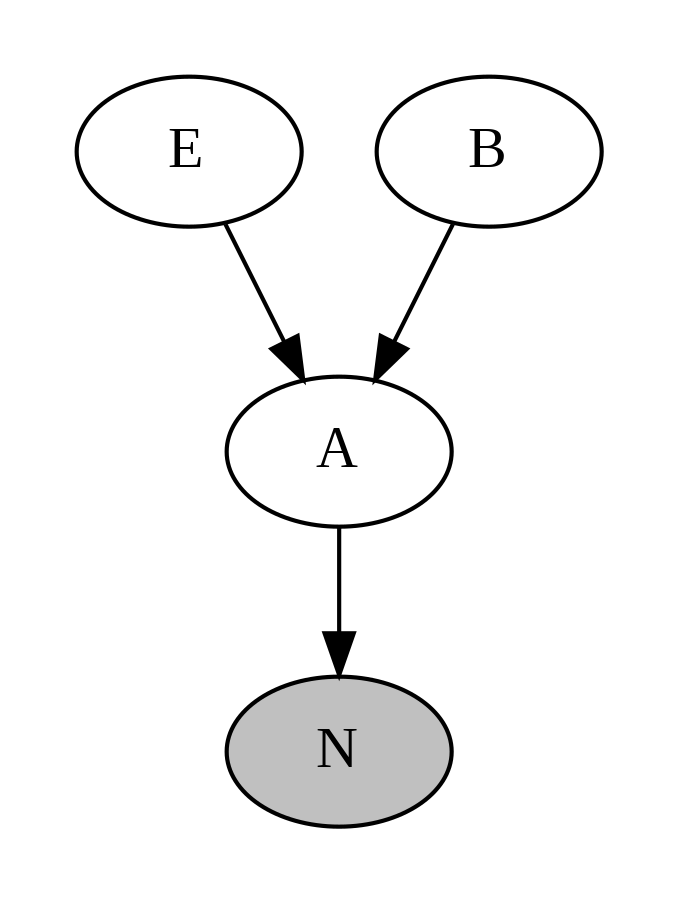

In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
from IPython.core.display import Image

g = nx.DiGraph()
g.add_edge("E", "A")
g.add_edge("B", "A")
g.add_edge("A", "N")

d = to_pydot(g)
d.get_node("N")[0].set_fillcolor("gray")
d.get_node("N")[0].set_style("filled")
d.set_dpi(300)
d.set_margin(0.2)
Image(d.create_png(), width = 200)

In [ ]:
from pgmpy.factors.discrete import TabularCPD #표형태
import numpy as np

P_E = TabularCPD('E', 2, [[0.9],[0.1]], state_names = {'E' : ['F', 'T']})
print('P(E)')
print(P_E)

P_B = TabularCPD('B', 2, [[0.7],[0.3]], state_names = {'B' : ['F', 'T']})
print('P(B)')
print(P_B)

P_A_I_EB = TabularCPD('A', 2, [[0.99, 0.1, 0.3, 0.01],
                               [0.01, 0.9, 0.7, 0.99]], 
                      evidence = ['E', 'B'],
                      evidence_card = [2, 2],
                      state_names = {'A' : ['F', 'T'], 'E' : ['F', 'T'], 'B' : ['F', 'T']})
print('P(A | E, B)')
print(P_A_I_EB)

P_N_I_A = TabularCPD('N', 2, [[0.9, 0.2],
                               [0.1, 0.8]], 
                      evidence = ['A'],
                      evidence_card = [2],
                      state_names = {'N' : ['F', 'T'], 'A' : ['F', 'T']})
print('P(N | A)')
print(P_N_I_A)


P(E)
+------+-----+
| E(F) | 0.9 |
+------+-----+
| E(T) | 0.1 |
+------+-----+
P(B)
+------+-----+
| B(F) | 0.7 |
+------+-----+
| B(T) | 0.3 |
+------+-----+
P(A | E, B)
+------+------+------+------+------+
| E    | E(F) | E(F) | E(T) | E(T) |
+------+------+------+------+------+
| B    | B(F) | B(T) | B(F) | B(T) |
+------+------+------+------+------+
| A(F) | 0.99 | 0.1  | 0.3  | 0.01 |
+------+------+------+------+------+
| A(T) | 0.01 | 0.9  | 0.7  | 0.99 |
+------+------+------+------+------+
P(N | A)
+------+------+------+
| A    | A(F) | A(T) |
+------+------+------+
| N(F) | 0.9  | 0.2  |
+------+------+------+
| N(T) | 0.1  | 0.8  |
+------+------+------+


In [ ]:
from pgmpy.models import BayesianModel

model = BayesianModel( #베이지안 망 구조 정의 --> 그래프
    [('E', 'A'), ('B', 'A'), ('A', 'N')]
)

model.add_cpds(P_E, P_B, P_A_I_EB, P_N_I_A) # 그래프에 확률분포 등록
model.check_model()

True

In [ ]:
from pgmpy.inference import VariableElimination

#추론
infer = VariableElimination(model)
A_dist = infer.query(['A'])
print('P(A)')
print(A_dist)

N_I_EF_BT = infer.query(['N'], evidence = {'E' : 'F', 'B' : 'T'})
print("P(N | E = F , B = T")
print(N_I_EF_BT)

N_I_AF_BT = infer.query(['N'], evidence = {'A' : 'F', 'B' : 'T'})
print("P(N | A = F , B = T")
print(N_I_AF_BT)

Eliminating: E: 100%|██████████| 1/1 [00:00<00:00, 470.58it/s]

P(A)
+------+----------+
| A    |   phi(A) |
+======+==========+
| A(F) |   0.6720 |
+------+----------+
| A(T) |   0.3280 |
+------+----------+
P(N | E = F , B = T
+------+----------+
| N    |   phi(N) |
+======+==========+
| N(F) |   0.2700 |
+------+----------+
| N(T) |   0.7300 |
+------+----------+
P(N | A = F , B = T
+------+----------+
| N    |   phi(N) |
+======+==========+
| N(F) |   0.9000 |
+------+----------+
| N(T) |   0.1000 |
+------+----------+


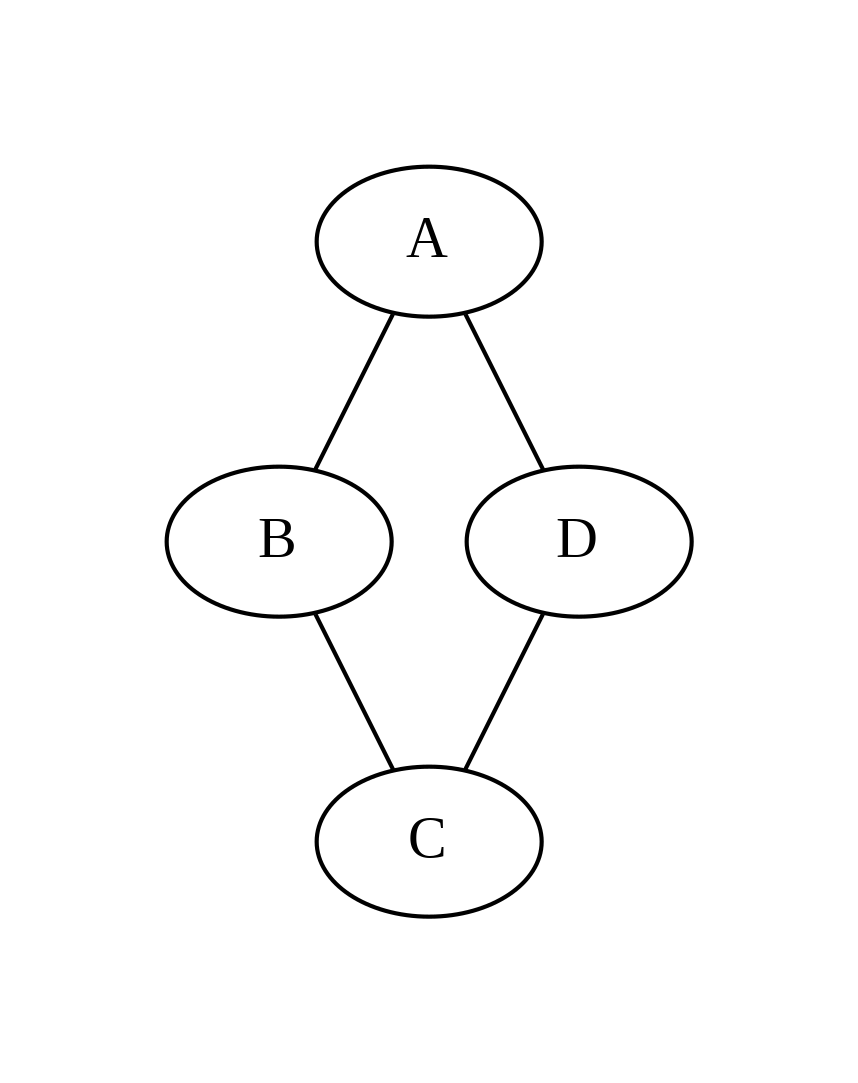

In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
from IPython.core.display import Image

g = nx.Graph()
g.add_edge("A", "B")
g.add_edge("D", "A")
g.add_edge("B", "C")
g.add_edge("C", "D")

d = to_pydot(g)
d.set_dpi(300)
d.set_margin(0.5)
Image(d.create_png(), width = 200)

In [ ]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor

model = MarkovModel([('A','B'), ('B','C'), ('C','D'), ('D','A')])
factor1 = DiscreteFactor(['A', 'B'], [2,2], [30, 5, 1, 10], 
                        state_names = {'A' : [0,1], 'B' : [0,1]})
factor2 = DiscreteFactor(['B', 'C'], [2,2], [100, 1, 1, 100], 
                        state_names = {'B' : [0,1], 'C' : [0,1]})
factor3 = DiscreteFactor(['C', 'D'], [2,2], [1, 100, 100, 1], 
                        state_names = {'C' : [0,1], 'D' : [0,1]})
factor4 = DiscreteFactor(['D', 'A'], [2,2], [100, 1, 1, 100], 
                        state_names = {'D' : [0,1], 'A' : [0,1]})

model.add_factors(factor1, factor2, factor3, factor4)
model.check_model()

True

In [ ]:
import numpy as np
pf_value = model.get_partition_function() #분할함수 값 get
print("\n분할 함수 값 : ", pf_value)

infer = VariableElimination(model)

phi_ABCD = infer.query(['A', 'B', 'C', 'D'])
print('phi(A,B,C,D)')
print(phi_ABCD)
P_ABCD = phi_ABCD.values / pf_value # 팩터의 곱 / 분할 함수값 --> 확률
PABCD = np.reshape(P_ABCD, -1)
for val in PABCD:
  print(val, '\n')

AIBOC1_dist = infer.query(['A'], evidence={'B' : 0, 'C' : 1})
#phi(A | B = 0 , C = 1)
print("phi(A | B = 0 , C = 1)")
print(AIBOC1_dist)
P_AIB0C1 = AIBOC1_dist.values / np.sum(AIBOC1_dist.values)
for val in P_AIB0C1:
  print(val, '\n')

0it [00:00, ?it/s]
Eliminating: D: 100%|██████████| 1/1 [00:00<00:00, 346.04it/s]


분할 함수 값 :  7201840.0
phi(A,B,C,D)
+------+------+------+------+----------------+
| B    | C    | D    | A    |   phi(B,C,D,A) |
+======+======+======+======+================+
| B(0) | C(0) | D(0) | A(0) |    300000.0000 |
+------+------+------+------+----------------+
| B(0) | C(0) | D(0) | A(1) |       100.0000 |
+------+------+------+------+----------------+
| B(0) | C(0) | D(1) | A(0) |    300000.0000 |
+------+------+------+------+----------------+
| B(0) | C(0) | D(1) | A(1) |   1000000.0000 |
+------+------+------+------+----------------+
| B(0) | C(1) | D(0) | A(0) |    300000.0000 |
+------+------+------+------+----------------+
| B(0) | C(1) | D(0) | A(1) |       100.0000 |
+------+------+------+------+----------------+
| B(0) | C(1) | D(1) | A(0) |        30.0000 |
+------+------+------+------+----------------+
| B(0) | C(1) | D(1) | A(1) |       100.0000 |
+------+------+------+------+----------------+
| B(1) | C(0) | D(0) | A(0) |       500.0000 |
+------+------+------+---